# Credit Card Approval Project - Mahender Kore

## Project Goal:
    
1.Perform Data Cleaning and EDA to derive insights of factors effecting the credit card approval

2.Build Machine learning models to predict the credit card approval status.

## Step1 : Defining Objective and Hypothesis

### Research question:
#### Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  
Predicting a good client in credit card approval is crucial for banks as it reduces credit risk, minimizes defaults, and ensures a healthier credit card portfolio, leading to improved financial stability and profitability.

#### How is it going to impact the banking sector? 

Implementing this credit card approval analysis can streamline the banking sector by facilitating faster and informed credit decisions, enhancing customer experience, reducing credit losses, and improving overall efficiency in credit operations.

#### If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

The proposed method addresses the knowledge gap in credit risk assessment by leveraging advanced analytics and machine learning, enabling banks in India to optimize their credit card approval process and stay competitive in a data-driven financial landscape.


#### Problem Statement
The problem statement is framed on the above reasearch question.

This project focuses on credit card approvals, a crucial process that banks carry out to manage risk and maintain profitability.

In particular, it deals with how banks factor in default risks during this process. 

When a person applies for a credit card, banks perform a comprehensive analysis, evaluating the likelihood of potential defaults based on the applicant's financial history, income stability, among other factors.

### Assumptions
Assumptions for credit card approval analysis:

1.The dataset used is assumed to be unbiased.

2.The data is assumed to be accurate, complete, and reliable for meaningful analysis.

3.Relationships between applicant attributes and creditworthiness are assumed to be stable over time.

4.Decision criteria and risk assessment models are assumed to remain consistent for future applicants.



### Hypothesis : Annual Income on Credit risk

#### Null Hypothesis (H0): 
The income by the applicant does not significantly affect their credit risk

####  Alternative Hypothesis (Ha): 
High Annual income is associated with lower credit risk


## Step2 : Data collection and understanding

##### Loading libraries, Reading all the data files and creating Dataframes <a id='loading-libraries'></a>  


In [1]:
# importing the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

##### Reading data from 'Credit_card.csv' and 'Credit_card_label.csv'


In [2]:
 # loading the data set,Read the file and save credit_raw ,credit_label_raw 
credit_raw = pd.read_csv("Credit_card.csv")
credit_label_raw = pd.read_csv("Credit_card_label.csv")

In [3]:
#loading top 5 records
credit_raw.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
#loading top 5 records
credit_label_raw.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


##### Merging the two table based on common column

In [5]:
# joining the two table based on common column 'Ind_Id'
credit = pd.merge(left= credit_raw, right= credit_label_raw, how = 'inner',on = 'Ind_ID')

In [6]:
#loading top 5 records
credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
#total no of records
credit.shape

(1548, 19)

 There are 1548 records with 19 different columns

In [8]:
#displaying the column variables
credit.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

##### Formatting the column name in same format for all, label into credit status 0 :approved 1: rejected


In [9]:
#renaming the column names
credit.columns = ['Id', 'Gender', 'Car_owner', 'Property_owner', 'Children',
       'Annual_income', 'Type_income', 'Education', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_phone', 'Phone', 'Email', 'Type_occupation', 'Family_members',
       'Credit_status']

##### converting the "Birthday count" and "Employed_days " into age and no of Employed years respectively

In [10]:
# converting into age
credit['Age'] = ((credit['Birthday_count']*(-1)) +1 )//365

In [11]:
# coverting employee_days to  employee_years
credit['Employed_years'] = ((credit['Employed_days']*(-1)) +1 )//365

##### Checking for error ,  Age would be always greater then 0

In [12]:
#checking the inconsitencies in Age column
(credit["Age"] < 0).value_counts()

False    1548
Name: Age, dtype: int64

There is no inconsitency Age column

##### As the Data set source , mentioned negative employed_years represents unemployed(0 years of employement)

In [13]:
##checking the inconsitencies in Employed_years column
(credit["Employed_years"] < 0).value_counts()

False    1287
True      261
Name: Employed_years, dtype: int64

 There are 261 unemployed peresonal, Assigning them 0 Employment_years 

In [14]:
# replace unemployed_years as 0
credit['Employed_years']= credit['Employed_years'].apply(lambda x : 0 if x < 0 else x)

In [15]:
# droping the columns 'Birth_day 'count and 'Employee_days'
credit.drop(columns=['Birthday_count','Employed_days'],axis = 1, inplace = True)

#### Understanding the Data set

In [16]:
# Data basic understanding
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_owner        1548 non-null   object 
 3   Property_owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Mobile_phone     1548 non-null   int64  
 11  Work_phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  Email            1548 non-null   int64  
 14  Type_occupation  1060 non-null   object 
 15  Family_members   1548 non-null   int64  
 16  Credit_status    1548 non-null   int64  
 17  Age           

 All were correcting data typed and there are missing values, we shall deal with them in step 3

In [17]:
# Descriptive statitics of numerical columns
credit.describe()

,Id,Children,Annual_income,Mobile_phone,Work_phone,Phone,Email,Family_members,Credit_status,Age,Employed_years
count,1.548000e+03,1548.000000,1.525000e+03,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1526.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,1.0,0.208010,0.309432,0.092377,2.161499,0.113049,43.445609,5.667959
std,4.171759e+04,0.776691,1.132530e+05,0.0,0.406015,0.462409,0.289651,0.947772,0.316755,11.587528,6.517409
min,5.008827e+06,0.000000,3.375000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,34.000000,1.000000
50%,5.078842e+06,0.000000,1.665000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,42.000000,4.000000
75%,5.115673e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,53.000000,8.000000
max,5.150412e+06,14.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,68.000000,40.000000


From primary analyis there are ouliers in 'Children','Annual_income','Age','Employement_years' , we shall address this in step 3: Outlier Detection

In [18]:
# Descriptive statitics of categorical columns
credit.describe(include = 'object')

,Gender,Car_owner,Property_owner,Type_income,Education,Marital_status,Housing_type,Type_occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [19]:
# Understanding no of unique values in each categorical variable|
for col in credit.describe(include= 'object').columns:
    print(col)
    print("nunique: ",credit[col].nunique())
    print("unqiune values: ",credit[col].unique())
    print('-'*70)

Gender
nunique:  2
unqiune values:  ['M' 'F' nan]
----------------------------------------------------------------------
Car_owner
nunique:  2
unqiune values:  ['Y' 'N']
----------------------------------------------------------------------
Property_owner
nunique:  2
unqiune values:  ['Y' 'N']
----------------------------------------------------------------------
Type_income
nunique:  4
unqiune values:  ['Pensioner' 'Commercial associate' 'Working' 'State servant']
----------------------------------------------------------------------
Education
nunique:  5
unqiune values:  ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
----------------------------------------------------------------------
Marital_status
nunique:  5
unqiune values:  ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
----------------------------------------------------------------------
Housing_type
nunique:  6
unqiune values:  ['House / 

In [20]:
# understanding  duplicates in the dataset
credit.duplicated().sum()

0

There are no duplicates present in dataset

## Step3 : Data Cleaning and Pre-processing

In [21]:
#displaying the columns
credit.columns

Index(['Id', 'Gender', 'Car_owner', 'Property_owner', 'Children',
       'Annual_income', 'Type_income', 'Education', 'Marital_status',
       'Housing_type', 'Mobile_phone', 'Work_phone', 'Phone', 'Email',
       'Type_occupation', 'Family_members', 'Credit_status', 'Age',
       'Employed_years'],
      dtype='object')

##### Dealing with Missing values

In [22]:
# Calculating no of missing values
credit.isnull().sum().sort_values(ascending= False)

Type_occupation    488
Annual_income       23
Age                 22
Gender               7
Id                   0
Work_phone           0
Credit_status        0
Family_members       0
Email                0
Phone                0
Housing_type         0
Mobile_phone         0
Marital_status       0
Education            0
Type_income          0
Children             0
Property_owner       0
Car_owner            0
Employed_years       0
dtype: int64

##### There are more no of missing values in 'Type_occupation'(30%), dropping the column

In [23]:
# dropping the column Type_occupation
credit.drop(columns = ['Type_occupation'], axis = 1, inplace = True)

Imputating the 'Gender' (categorical variable) with mode

In [24]:
# imputating the gender by mode value
from sklearn.impute import SimpleImputer
sc = SimpleImputer(strategy='most_frequent')
credit['Gender'] = sc.fit_transform(credit[['Gender']])

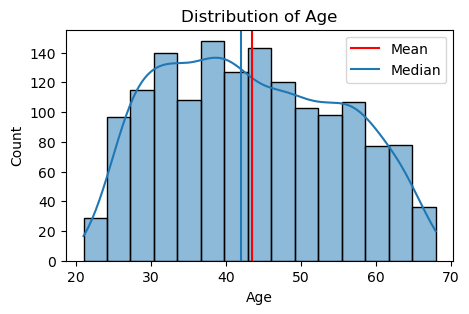

In [25]:
# Understanding the 'Age' variable through distribution plot 
plt.figure(figsize = (5,3))
sns.histplot(credit["Age"],kde = True)
plt.axvline(credit['Age'].mean(),color = 'red',label = 'Mean')
plt.axvline(credit['Age'].median(),label = 'Median')
plt.title("Distribution of Age")
plt.legend()
plt.show()

In [26]:
#Skewness of the 'Age' Variable
credit["Age"].skew()

0.17200634004172913

##### Age is based on the 'Type_income' like Pensioner will be having higher Age, We shall follow the mean imputation based on Income group

In [27]:
# mean age based on income type
credit.groupby(['Type_income'])['Age'].mean()

Type_income
Commercial associate    39.726519
Pensioner               58.928302
State servant           40.974138
Working                 40.291188
Name: Age, dtype: float64

In [28]:
# Calculate the mean of 'Annual_income' for each 'Type_income' group
mean_income_by_type = credit.groupby('Type_income')['Age'].transform('mean')

# Use 'mean_income_by_type' to fill missing values in 'Annual_income'
credit['Age'] = credit['Age'].fillna(mean_income_by_type)


##### Annual_income is based on the 'Type_income' like Pensioner will be having lower Income, We shall follow the mean imputation based on Income group

In [29]:
# mean age based on income type
credit.groupby(['Type_income'])['Annual_income'].mean()

Type_income
Commercial associate    234600.000000
Pensioner               155175.096226
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [30]:
# Calculate the mean of 'Annual_income' for each 'Type_income' group
mean_income_by_type = credit.groupby('Type_income')['Annual_income'].transform('mean')

# Use 'mean_income_by_type' to fill missing values in 'Annual_income'
credit['Annual_income'] = credit['Annual_income'].fillna(mean_income_by_type)

In [31]:
# checking the dataset missing values
credit.isnull().sum().sort_values(ascending= False)

Id                0
Gender            0
Age               0
Credit_status     0
Family_members    0
Email             0
Phone             0
Work_phone        0
Mobile_phone      0
Housing_type      0
Marital_status    0
Education         0
Type_income       0
Annual_income     0
Children          0
Property_owner    0
Car_owner         0
Employed_years    0
dtype: int64

#### Now, data set is free from missing values

In [32]:
#copying the dataset into new dataframe
credit_copy = credit.copy(deep = True)

##### From primary analyis we found, there are  ouliers in 'Children', 'Annual_income', 'Age' 'Employement_years' 

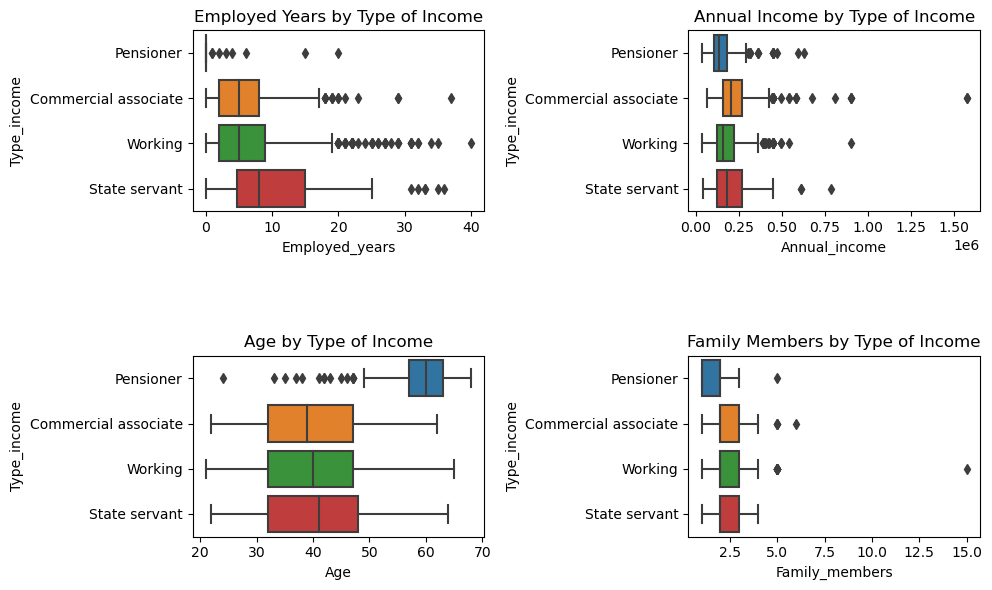

In [33]:
#Creating the boxplot to detect outliers
#create a 2x2 grid for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# plot 1
sns.boxplot(x='Employed_years', y='Type_income', data=credit_copy, ax=axs[0, 0])
axs[0, 0].set_title("Employed Years by Type of Income")

# plot 2
sns.boxplot(y='Type_income', x='Annual_income', data=credit_copy, ax=axs[0, 1])
axs[0, 1].set_title("Annual Income by Type of Income")

# plot 3
sns.boxplot(y='Type_income', x='Age', data=credit_copy, ax=axs[1, 0])
axs[1, 0].set_title("Age by Type of Income")

# plot 4
sns.boxplot(x='Family_members', y='Type_income', data=credit_copy, ax=axs[1, 1])
axs[1, 1].set_title("Family Members by Type of Income")

# adjust layout to avoid overlapping titles and labels
plt.tight_layout()
plt.subplots_adjust(hspace = 0.8)

#show the combined plot
plt.show()

The above boxplots shows there are outliers and treating them before data analysis is very important

##### Detecting the ouliers using the IQR method and capping the ouliers to lower and upper limit

In [34]:
# Create a list of columns for which you want to replace outliers
outlier_cols = ['Annual_income', 'Age', 'Employed_years', 'Family_members']

# Calculate the first quartile (Q1) and third quartile (Q3) for each 'Type_income' group for all the columns
q1 = credit_copy.groupby('Type_income')[outlier_cols].transform('quantile', 0.25)
q3 = credit_copy.groupby('Type_income')[outlier_cols].transform('quantile', 0.75)

# Calculate the interquartile range (IQR) for each 'Type_income' group for all the columns
iqr = q3 - q1

# Define the lower and upper bounds for outliers detection for all the columns
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the lower and upper bounds of their respective groups for all the columns
for col in outlier_cols:
    is_lower_outlier = credit_copy[col] < lower_bound[col]
    is_upper_outlier = credit_copy[col] > upper_bound[col]
    credit_copy.loc[is_lower_outlier, col] = lower_bound[col][is_lower_outlier]
    credit_copy.loc[is_upper_outlier, col] = upper_bound[col][is_upper_outlier]


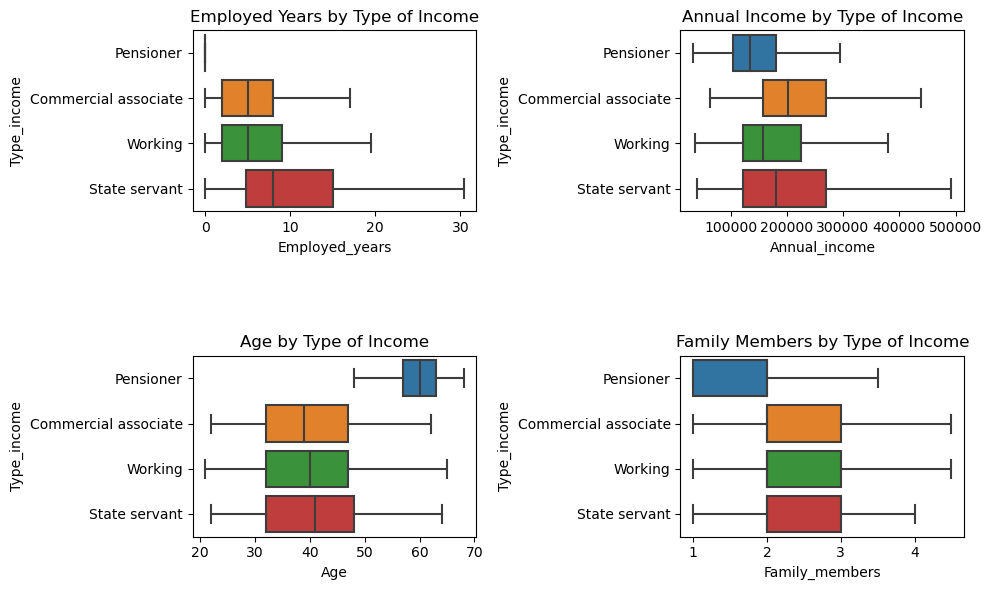

In [35]:
# Outliers detection after the capping 
# Create a 2x2 grid for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot 1
sns.boxplot(x='Employed_years', y='Type_income', data=credit_copy, ax=axs[0, 0])
axs[0, 0].set_title("Employed Years by Type of Income")

# Plot 2
sns.boxplot(y='Type_income', x='Annual_income', data=credit_copy, ax=axs[0, 1])
axs[0, 1].set_title("Annual Income by Type of Income")

# Plot 3
sns.boxplot(y='Type_income', x='Age', data=credit_copy, ax=axs[1, 0])
axs[1, 0].set_title("Age by Type of Income")

# Plot 4
sns.boxplot(x='Family_members', y='Type_income', data=credit_copy, ax=axs[1, 1])
axs[1, 1].set_title("Family Members by Type of Income")

# Adjust layout to avoid overlapping titles and labels
plt.tight_layout()
plt.subplots_adjust(hspace = 0.8)

# Show the combined plot
plt.show()


The above boxplots depicts the data set has no outliers

##### Now, the data set is free from ouliers,missing, inconsitences and ready for Analyis

In [36]:
# This Cleaned dataset is used for sql insights generation
credit_copy.to_csv("credit_cleaned.csv",index = False,header = True)

## Step 4 : EDA

##### 1.Finding no of credit cards Accepted and Rejected.

0    1373
1     175
Name: Credit_status, dtype: int64
--------------------------------------------------


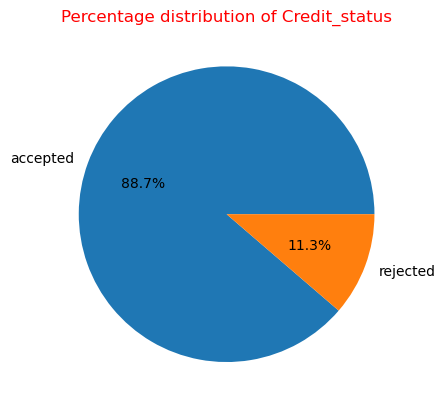

In [37]:
#Calculating the credit_card acceptance rate
print(credit_copy['Credit_status'].value_counts())
print('-'*50)
plt.pie(credit_copy['Credit_status'].value_counts(),labels=['accepted','rejected'],autopct='%1.1f%%')
plt.title("Percentage distribution of Credit_status",color = 'red')
plt.show()

The pie chart shows 88.7% applicants got accepted and only 11.3% applicants were rejected for Credit_card,

This Shows the data is Imbalanced and care to be taken while modeling using machine learning techniques

##### 2.No of Male and Female applicants and their approval rate.

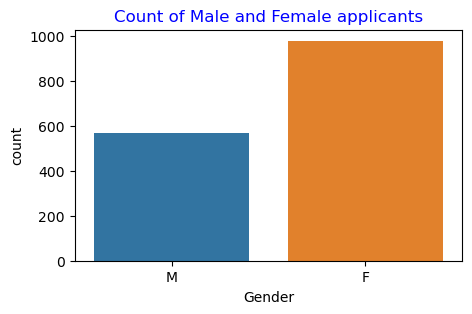

F    980
M    568
Name: Gender, dtype: int64
F    63.307494
M    36.692506
Name: Gender, dtype: float64


In [38]:
#Calculating Male and Female applicants
plt.figure(figsize=(5,3))
sns.countplot(x= 'Gender',data= credit_copy)
plt.title("Count of Male and Female applicants",color= 'Blue')
plt.show()
print(credit_copy['Gender'].value_counts())
print(credit_copy['Gender'].value_counts(normalize=True)*100)

There are more female applicants (63.3%) then male applicants (36.7%)

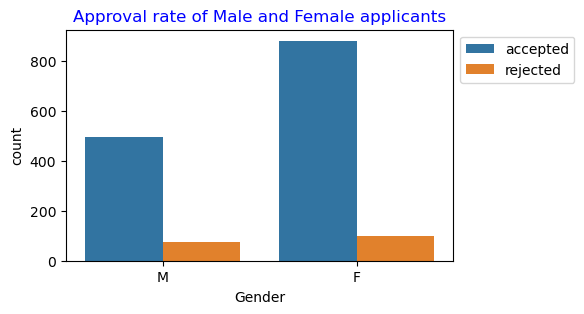

Gender  Credit_status
F       0                89.795918
        1                10.204082
M       0                86.795775
        1                13.204225
Name: Credit_status, dtype: float64


In [39]:
#Calculating the credit_card acceptance rate on Gender
plt.figure(figsize=(5,3))
sns.countplot(x= 'Gender',data= credit_copy,hue= 'Credit_status')
plt.title("Approval rate of Male and Female applicants",color= 'Blue')
plt.legend(['accepted','rejected'],bbox_to_anchor=(1,1))
plt.show()
print(credit_copy.groupby(['Gender'])['Credit_status'].value_counts(normalize = True)*100)

Female applicants(89.8%) have higher chance of getting the approval 

##### 3.Understand the Type_income varaiable in according to related columns variables

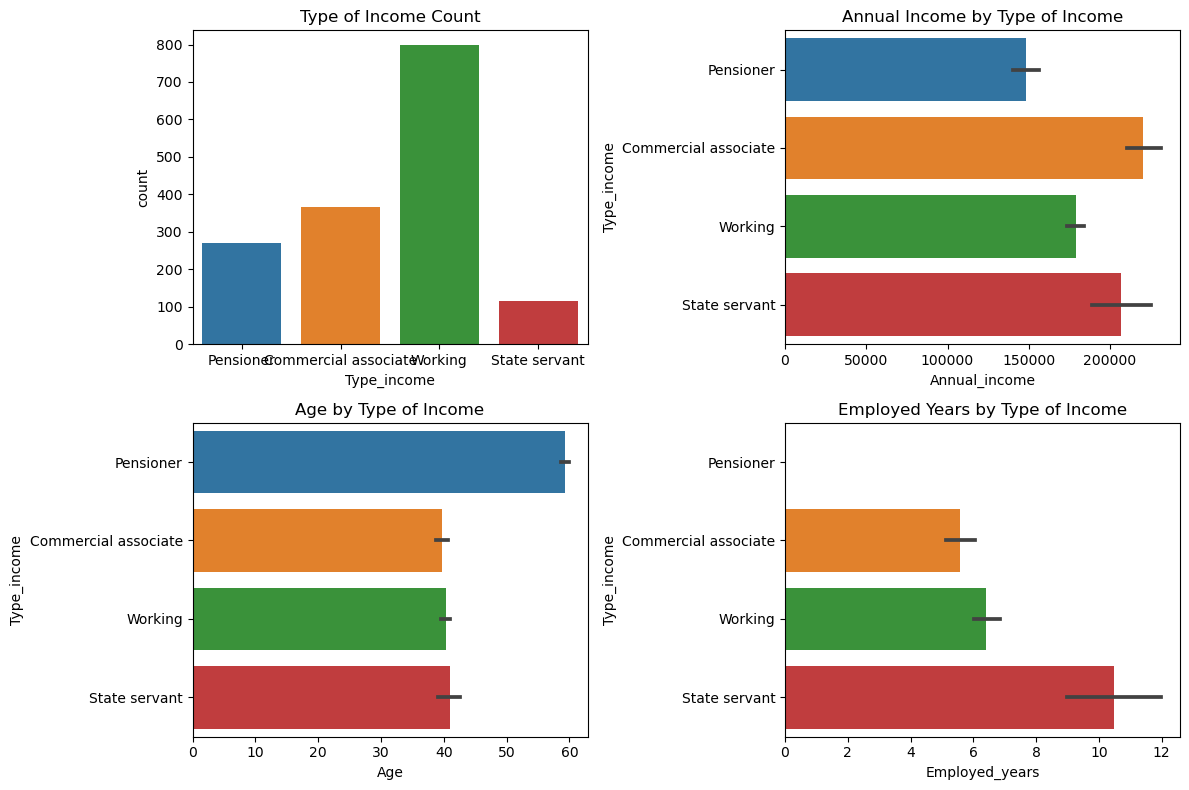

In [40]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first countplot on the first subplot
sns.countplot(x='Type_income', data=credit_copy, ax=axes[0, 0])
axes[0, 0].set_title('Type of Income Count')

# Plot the first barplot on the second subplot
sns.barplot(y='Type_income', x='Annual_income', data=credit_copy, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income by Type of Income')

# Plot the second barplot on the third subplot
sns.barplot(y='Type_income', x='Age', data=credit_copy, ax=axes[1, 0])
axes[1, 0].set_title('Age by Type of Income')

# Plot the third barplot on the fourth subplot
sns.barplot(y='Type_income', x='Employed_years', data=credit_copy, ax=axes[1, 1])
axes[1, 1].set_title('Employed Years by Type of Income')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


 Working in private company are more likely to apply for credit card, where as State_servants are less likely to apply, The reason would be the Annual_income of each category.

The salary slab would be the deciding factor, state servants are likely to get the benefits of Government

 The commerical associate have higher income followed by state servant,working and it is definite that pensior are non-employee(0) group  will have lower income
 
Pensioner are the one retired , they have aged when compared to other groups


##### 4.Type_income on Credit status

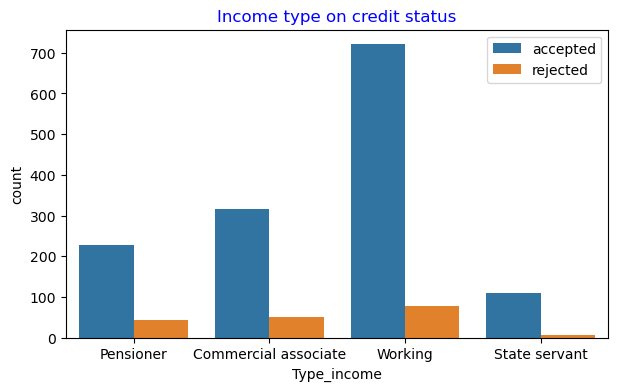

Type_income           Credit_status
Commercial associate  0                86.301370
                      1                13.698630
Pensioner             0                84.386617
                      1                15.613383
State servant         0                94.827586
                      1                 5.172414
Working               0                90.350877
                      1                 9.649123
Name: Credit_status, dtype: float64


In [41]:
#Calculating the credit_card acceptance rate on Type_income
plt.figure(figsize=(7,4))
sns.countplot(x= 'Type_income',data= credit_copy,hue= 'Credit_status')
plt.title("Income type on credit status",color= 'Blue')
plt.legend(['accepted','rejected'],bbox_to_anchor=(1,1))
plt.show()
print(credit_copy.groupby(['Type_income'])['Credit_status'].value_counts(normalize = True)*100)

This is evident , the "Working" class in private company due to combined factors of low income and non-benefits  provided for the State servant, they are most likely to apply for credit card and also important observation we can interptered is the Job stability also places an important factor in credit card approval(i.e for state servant job stability is high, there credit card approval is high) 

##### 5.Credit dependent on car and property

In [42]:
#understanding the property and car ownership on the credit status
credit_copy.groupby(['Car_owner','Property_owner'])['Credit_status'].value_counts(normalize = True)*100

Car_owner  Property_owner  Credit_status
N          N               0                88.509317
                           1                11.490683
           Y               0                88.205980
                           1                11.794020
Y          N               0                87.037037
                           1                12.962963
           Y               0                90.441176
                           1                 9.558824
Name: Credit_status, dtype: float64

We can depict that owing a car and property doesn't matter, has the average acceptance is 88% and rejection 12% in all conditions

##### 6.Marital_status on credit card approval

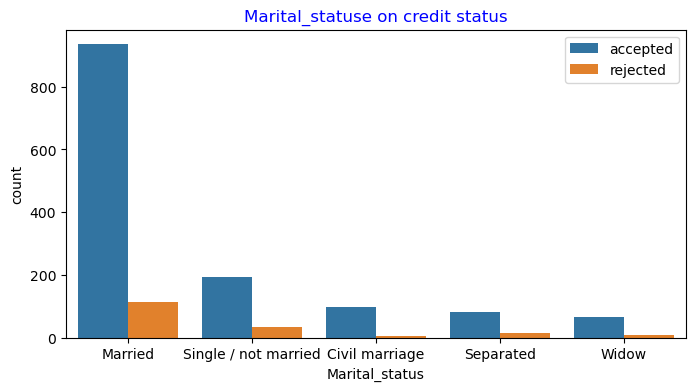

Marital_status        Credit_status
Civil marriage        0                96.039604
                      1                 3.960396
Married               0                89.132507
                      1                10.867493
Separated             0                85.416667
                      1                14.583333
Single / not married  0                84.581498
                      1                15.418502
Widow                 0                89.333333
                      1                10.666667
Name: Credit_status, dtype: float64


In [43]:
#understanding the marital status on credit_card acceptance.
plt.figure(figsize=(8,4))
sns.countplot(x= 'Marital_status',data= credit_copy,hue= 'Credit_status')
plt.title("Marital_statuse on credit status",color= 'Blue')
plt.legend(['accepted','rejected'],bbox_to_anchor=(1,1))
plt.show()
print(credit_copy.groupby(['Marital_status'])['Credit_status'].value_counts(normalize = True)*100)

The married living with Family are the highest among the credit card applicants followed by Single/not married ,

The civil marriage had highest acceptance rate, lowest acceptance for Single/ not marrried.

##### 7.Education level  on Credit status

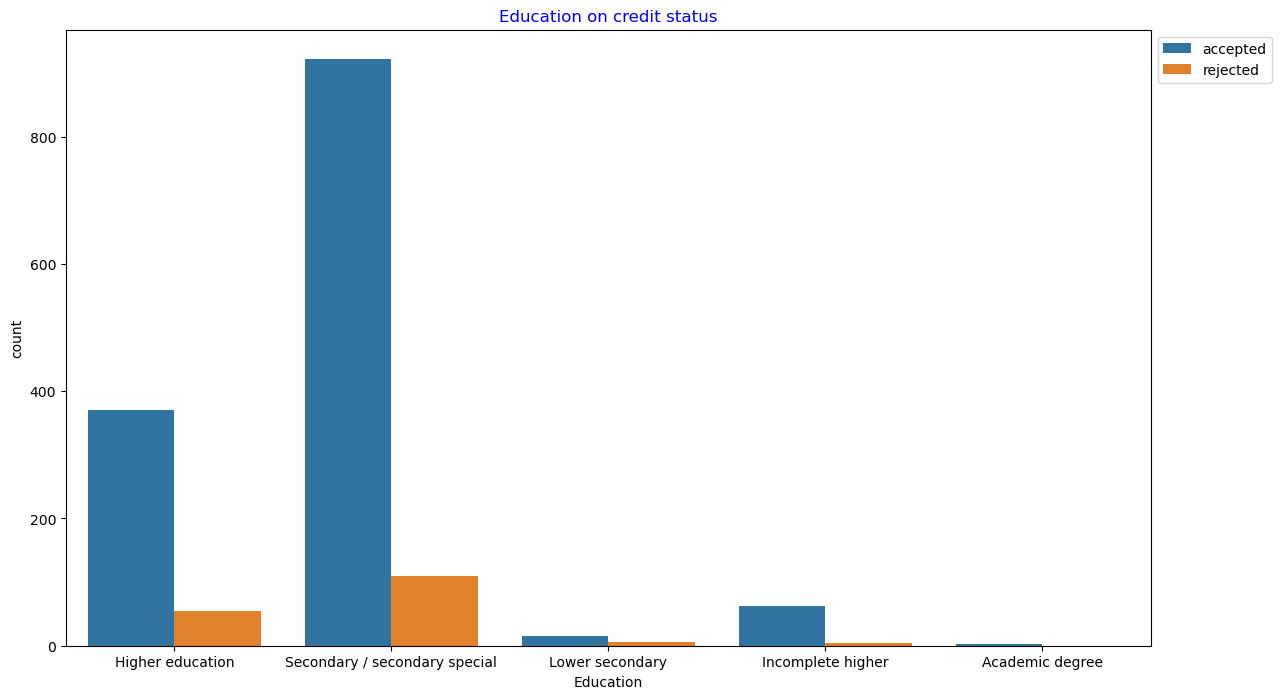

Education                      Credit_status
Academic degree                0                100.000000
Higher education               0                 87.089202
                               1                 12.910798
Incomplete higher              0                 92.647059
                               1                  7.352941
Lower secondary                0                 71.428571
                               1                 28.571429
Secondary / secondary special  0                 89.427740
                               1                 10.572260
Name: Credit_status, dtype: float64


In [44]:
#understanding the Education level  on credit_card acceptance.
plt.figure(figsize=(14,8))
sns.countplot(x= 'Education',data= credit_copy,hue= 'Credit_status')
plt.title("Education on credit status",color= 'Blue')
plt.legend(['accepted','rejected'],bbox_to_anchor=(1,1))
plt.show()
print(credit_copy.groupby(['Education'])['Credit_status'].value_counts(normalize = True)*100)


 Importance observation that the 'Academic degree' holders get 100 % acceptance, we can observe higher the Education level , most likely to get the acceptance of credit card but the less in number where as 'Seconday' class consists of middle class received more applicants

##### 8.No of Family members on credit status

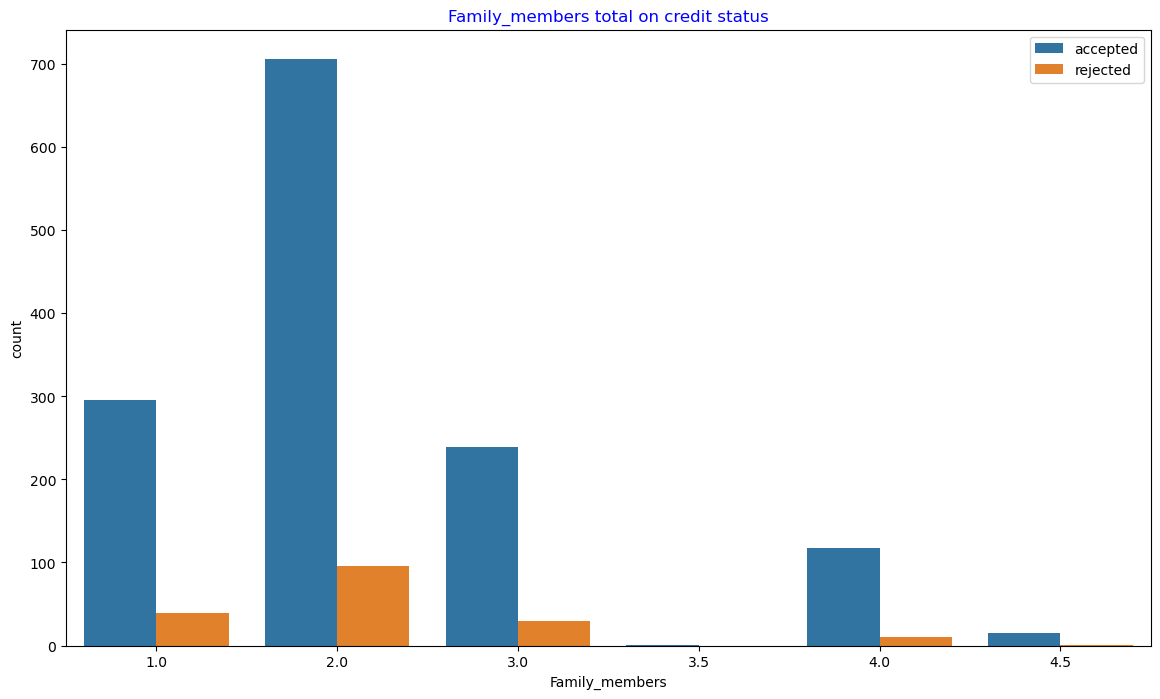

In [45]:
#understanding the Family members count on credit_card acceptance.
plt.figure(figsize=(14,8))
sns.countplot(x= 'Family_members',data= credit_copy,hue= 'Credit_status')
plt.title("Family_members total on credit status",color= 'Blue')
plt.legend(['accepted','rejected'],bbox_to_anchor=(1,1))
plt.show()

 Most Family are small family , newly married are more likely to apply for credit card`

##### 9.Correlation testing

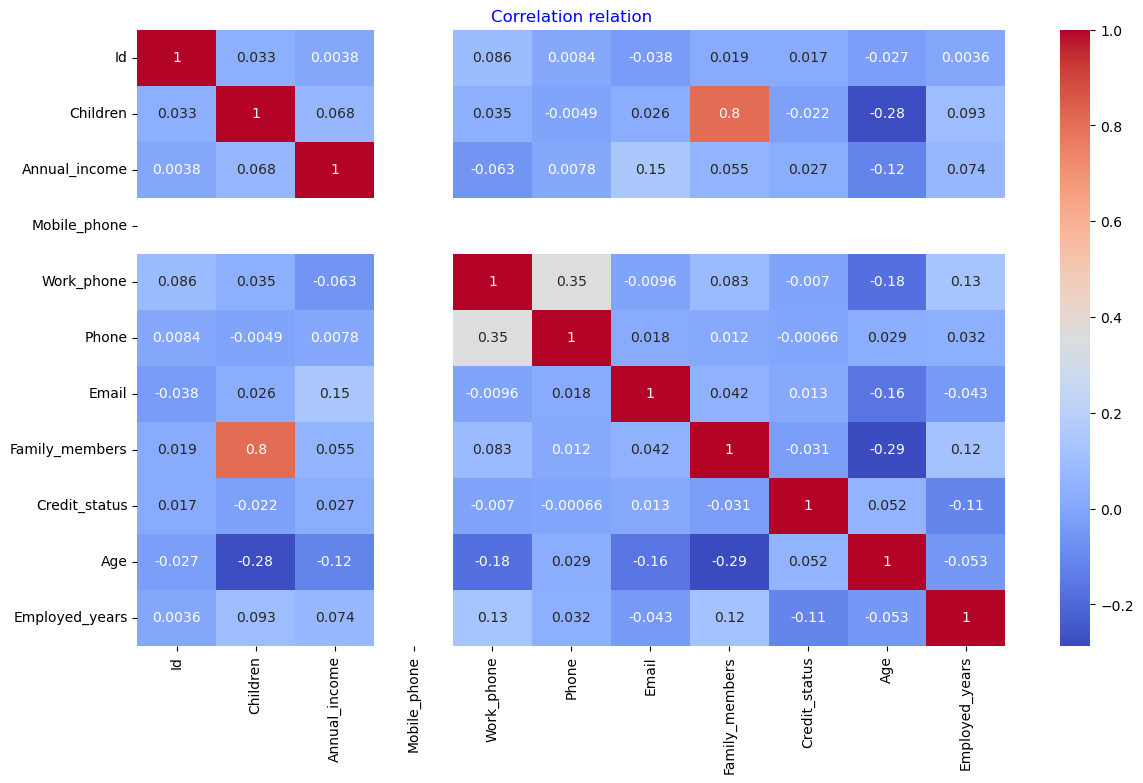

In [46]:
#understanding the correlation between various variables
plt.figure(figsize=(14,8))
sns.heatmap(credit_copy.corr(),annot = True,cmap='coolwarm')
plt.title("Correlation relation",color= 'Blue')
plt.show()

##### The credit_status shows positive co-relation with 'Annual_income','Age' and negative co-relation with 'Family_members'

## Step 5 : Hypothesis Testing

##### Testing the Hypothesis using the one way Annova and taking the siginificance level of 5% , i.e alpha = 0.05,
If P-value <= 0.05, reject the Null Hypothesis(Ho),

If P-value > 0.05, we accept the Null Hypothesis (Ho)


In [48]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
groups = [credit_copy[credit_copy['Annual_income'] == group]['Credit_status'] for group in credit_copy['Annual_income'].unique()]
f_stat, p_value = f_oneway(*groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 1.2569492832246965
P-Value: 0.045159224398941086


##### The obtained P-Value < 0.05, We reject the Null Hypothesis and We consider the Alternate Hypothesis

##### So , Higher Annual income people are more likely to get the credit card approved.

## Final Report Conculsion:



1. The Hypothesis Testing shows that high-income people are more likely to get credit card approval.


2. The pie chart shows that 88.7% of applicants got accepted, while only 11.3% were rejected for Credit card.


3. There are more female applicants (63.3%) than male applicants (36.7%).


4. Working in private companies makes applicants more likely to apply for a credit card, whereas State servants are less likely to apply due to income disparities. Commercial associates have higher income, followed by State servants and working professionals, while pensioners, who are non-employees, have lower income. Pensioners are typically retired and older than other groups.


5. The "Working" class in private companies, due to lower income and lack of benefits provided for State servants, is most likely to apply for a credit card. Job stability also plays an important role in credit card approval, with State servants having higher stability and approval rates.


6. Ownership of a car or property doesn't significantly impact credit card approval, as the average acceptance rate is 88% for all conditions.


7. Married individuals living with family are the highest among credit card applicants, followed by single individuals. Civil marriages have the highest acceptance rate, while single individuals have the lowest acceptance rate.

8. Academic degree holders have a 100% acceptance rate, indicating that higher education levels are more likely to lead to credit card approval. However, the number of applicants with an academic degree is less compared to those with a secondary education.


9. Most families applying for credit cards are small families, and newly married individuals are more likely to apply.


10. Credit_status shows positive correlation with Annual_income and Age, while it has a negative correlation with Family_members.


The bank's main focus have to be  on middle-aged working professionals to generate high revenue.